## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
print(sklearn.__version__)
#如果只有 0.19 記得要更新至 最新版本
%matplotlib inline


0.23.2


In [4]:
df_train = pd.read_csv("Titanic_train.csv")
display(df_train.head())
display(df_train.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [5]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


In [52]:
missing_index=df_train['Age'].isnull()
display(df_train['Age'][missing_index.values==True])
missing_index=df_train['Sex'].isnull()
display(df_train['Sex'][missing_index.values==True])
#數值計算
df_train[['Sex', 'Age']].groupby(['Sex'], as_index=False).mean().sort_values(by='Age', ascending=False)
# NoCabin的比例和 T 較接近


5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

Series([], Name: Sex, dtype: object)

,Sex,Age
1,male,30.726645
0,female,27.915709


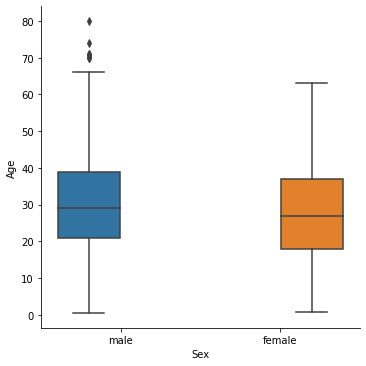

In [61]:
g = sns.catplot(x="Sex", y="Age", hue="Sex",
               data=df_train,kind="box")
#男生女生的年齡特性有一點點差異

In [50]:
# 檢查資料是否為常態分布 (H0:資料為常態分佈):
dat1 = df_train.loc[:, 'Age'][df_train.Sex == 'male'].dropna()
dat2 = df_train.loc[:, 'Age'][df_train.Sex == 'female'].dropna()
print(dat1)
print(dat2)
import scipy.stats
print(scipy.stats.shapiro(dat1))
# p < 0.05，不接受H0:資料非常態分佈
print(scipy.stats.shapiro(dat2))
# p < 0.05，不接受H0:資料非常態分佈。

0      22.0
4      35.0
6      54.0
7       2.0
12     20.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: Age, Length: 453, dtype: float64
1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
879    56.0
880    25.0
882    22.0
885    39.0
887    19.0
Name: Age, Length: 261, dtype: float64
ShapiroResult(statistic=0.9747278094291687, pvalue=4.571295733057923e-07)
ShapiroResult(statistic=0.9847873449325562, pvalue=0.007051751483231783)


In [ ]:
#  處理 NA 的函式
# 函式	說明
# dropna()	若有遺漏值，則將該標籤刪除
# fillna()	將遺漏值依設定值填補或依現有值向前或向後填補 ('ffill' 或 'bfill')
# isnull()	是否為遺漏值 (布林)
# notnull()	isnull 的相反 (布林)

In [46]:
# 7. 檢查資料是否為相同變異數 (H0: s12 = s22):
import scipy.stats
print(scipy.stats.levene(dat1, dat2, center = 'mean'))
# 結果: LeveneResult(statistic=0.013943126912121727, pvalue=0.9060367667521338)
# p = 0.013 < 0.05，不接受H0: s12 = s22。
# 相同變異數表示樣本來自相同母體(population)，不同變異數表示樣本取樣自不同母體。

LeveneResult(statistic=0.013943126912121727, pvalue=0.9060367667521338)


In [48]:
# 8. 使用Python計算兩組不成對資料t檢定:  Welch’s t-test
# scipy.stats.ttest_ind
# scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')[source]
import scipy.stats
scipy.stats.ttest_ind(dat1, dat2)
# 結果: Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797013709)
# p = 0.012671296797013709 < 0.05，不接受假設H0: 性別不同 年齡有差。

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797013709)

## 觀察 Age

In [ ]:
性別和年齡的關係

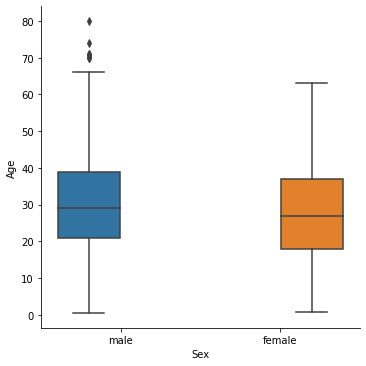

In [7]:
g = sns.catplot(x="Sex", y="Age", hue="Sex",
               data=df_train,kind="box")
#男生女生的年齡特性有一點點差異

In [ ]:
Pclass 和年齡的關係

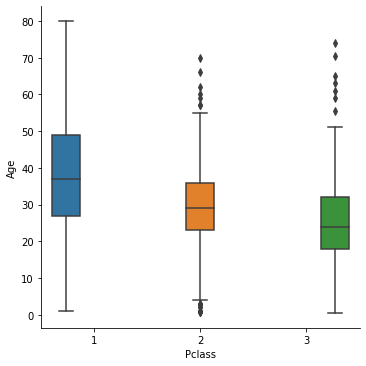

In [8]:
g = sns.catplot(x="Pclass", y="Age", hue="Pclass",
               data=df_train,kind="box")
#年齡較大者艙等較高

In [54]:
data={'sex': df_train['Sex'],
     'age':df_train['Age'],
     'Pclass':df_train['Pclass'],
     }

data=pd.DataFrame(data)
display(data)

,sex,age,Pclass
0,male,22.0,3
1,female,38.0,1
2,female,26.0,3
3,female,35.0,1
4,male,35.0,3
...,...,...,...
886,male,27.0,2
887,female,19.0,1
888,female,NaN,3
889,male,26.0,1


In [59]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = data.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

missing_index=data.isnull()
display(data[missing_index.values==True])

        missing_rate
sex         0.000000
age         0.198653
Pclass      0.000000


,sex,age,Pclass
5,1,NaN,3
17,1,NaN,2
19,0,NaN,3
26,1,NaN,3
28,0,NaN,3
...,...,...,...
859,1,NaN,3
863,0,NaN,3
868,1,NaN,3
878,1,NaN,3


In [55]:
from sklearn import preprocessing
print(data)
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
display(data)

        sex   age  Pclass
0      male  22.0       3
1    female  38.0       1
2    female  26.0       3
3    female  35.0       1
4      male  35.0       3
..      ...   ...     ...
886    male  27.0       2
887  female  19.0       1
888  female   NaN       3
889    male  26.0       1
890    male  32.0       3

[891 rows x 3 columns]


,sex,age,Pclass
0,1,22.0,3
1,0,38.0,1
2,0,26.0,3
3,0,35.0,1
4,1,35.0,3
...,...,...,...
886,1,27.0,2
887,0,19.0,1
888,0,NaN,3
889,1,26.0,1


In [56]:
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(data)))
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html?highlight=nan_euclidean


,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


In [60]:
# KNN
# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors) # 取一個鄰近值
df_filled = pd.DataFrame(imputer.fit_transform(data))
display(data[missing_index.values==True])
display(df_filled[missing_index.values==True])
display(df_filled)

,sex,age,Pclass
5,1,NaN,3
17,1,NaN,2
19,0,NaN,3
26,1,NaN,3
28,0,NaN,3
...,...,...,...
859,1,NaN,3
863,0,NaN,3
868,1,NaN,3
878,1,NaN,3


,0,1,2
5,1.0,22.0,3.0
17,1.0,35.0,2.0
19,0.0,26.0,3.0
26,1.0,22.0,3.0
28,0.0,26.0,3.0
...,...,...,...
859,1.0,22.0,3.0
863,0.0,26.0,3.0
868,1.0,22.0,3.0
878,1.0,22.0,3.0


,0,1,2
0,1.0,22.0,3.0
1,0.0,38.0,1.0
2,0.0,26.0,3.0
3,0.0,35.0,1.0
4,1.0,35.0,3.0
...,...,...,...
886,1.0,27.0,2.0
887,0.0,19.0,1.0
888,0.0,26.0,3.0
889,1.0,26.0,1.0


In [62]:
# KNN
# 設定 k 值
value_neighbors=3
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors) # 取三個鄰近值
df_filled = pd.DataFrame(imputer.fit_transform(data))
display(data[missing_index.values==True])
display(df_filled[missing_index.values==True])
display(df_filled)

,sex,age,Pclass
5,1,NaN,3
17,1,NaN,2
19,0,NaN,3
26,1,NaN,3
28,0,NaN,3
...,...,...,...
859,1,NaN,3
863,0,NaN,3
868,1,NaN,3
878,1,NaN,3


,0,1,2
5,1.0,19.666667,3.0
17,1.0,45.000000,2.0
19,0.0,19.000000,3.0
26,1.0,19.666667,3.0
28,0.0,19.000000,3.0
...,...,...,...
859,1.0,19.666667,3.0
863,0.0,19.000000,3.0
868,1.0,19.666667,3.0
878,1.0,19.666667,3.0


,0,1,2
0,1.0,22.0,3.0
1,0.0,38.0,1.0
2,0.0,26.0,3.0
3,0.0,35.0,1.0
4,1.0,35.0,3.0
...,...,...,...
886,1.0,27.0,2.0
887,0.0,19.0,1.0
888,0.0,19.0,3.0
889,1.0,26.0,1.0


In [ ]:
判斷補值的好壞?
可以運用模型預測準確度的指標，來判斷補值的好壞

MSE代表均方誤差(Mean-Square Error)。即絕對誤差的平均值，來判斷， MSE 越小代表補值的準確度越高。 還有其他的指標可以使用，在建立模型的課程中，會提到更多的指標。

Step1:取無遺失值的資料集

Step2:隨機取幾個資料點，當作遺失值

Step3:以step2產生的遺失值進行補值，

Step4: 計算MSE看補值的效果。

In [67]:
data={'sex': df_train['Sex'],
     'age':df_train['Age'],
     'Pclass':df_train['Pclass'],
     }

data=pd.DataFrame(data)
display(data)
from sklearn import preprocessing
#轉型 
le = preprocessing.LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
print(data['sex'])
# KNN
value_neighbors=3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,add_indicator= True)

print(data)


,sex,age,Pclass
0,male,22.0,3
1,female,38.0,1
2,female,26.0,3
3,female,35.0,1
4,male,35.0,3
...,...,...,...
886,male,27.0,2
887,female,19.0,1
888,female,NaN,3
889,male,26.0,1


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int32
     sex   age  Pclass
0      1  22.0       3
1      0  38.0       1
2      0  26.0       3
3      0  35.0       1
4      1  35.0       3
..   ...   ...     ...
886    1  27.0       2
887    0  19.0       1
888    0   NaN       3
889    1  26.0       1
890    1  32.0       3

[891 rows x 3 columns]


In [68]:
#* Step1:取無遺失值的資料集
import random
completet_data=data.dropna()
#重製index
completet_data=completet_data.reset_index(drop=True)
display(completet_data)

,sex,age,Pclass
0,1,22.0,3
1,0,38.0,1
2,0,26.0,3
3,0,35.0,1
4,1,35.0,3
...,...,...,...
709,0,39.0,3
710,1,27.0,2
711,0,19.0,1
712,1,26.0,1


In [74]:
pd.set_option("display.max_rows", 2000)
#* Step2:隨機取 20 個資料點，當作遺失值
a = random.sample(list(completet_data.index),20) 
missing_data=completet_data.copy()
missing_data['sex'].iloc[a]=np.nan
missing_data['Pclass'].iloc[a]=np.nan
display(missing_data)

D:\Users\Meng-Hsin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,sex,age,Pclass
0,1.0,22.00,3.0
1,0.0,38.00,1.0
2,0.0,26.00,3.0
3,0.0,35.00,1.0
4,1.0,35.00,3.0
5,1.0,54.00,1.0
6,1.0,2.00,3.0
7,0.0,27.00,3.0
8,0.0,14.00,2.0
9,0.0,4.00,3.0


In [75]:
pd.set_option("display.max_rows", 2000)
#* Step3:以step2產生的遺失值進行補值
verify_impute = pd.DataFrame(imputer.fit_transform(missing_data))
verify_impute.rename(columns={0:'sex',1:'age',2:'Pclass',3:'imputed_s',4:'imputed_P'},inplace=True)
display(verify_impute)

,sex,age,Pclass,imputed_s,imputed_P
0,1.000000,22.00,3.000000,0.0,0.0
1,0.000000,38.00,1.000000,0.0,0.0
2,0.000000,26.00,3.000000,0.0,0.0
3,0.000000,35.00,1.000000,0.0,0.0
4,1.000000,35.00,3.000000,0.0,0.0
5,1.000000,54.00,1.000000,0.0,0.0
6,1.000000,2.00,3.000000,0.0,0.0
7,0.000000,27.00,3.000000,0.0,0.0
8,0.000000,14.00,2.000000,0.0,0.0
9,0.000000,4.00,3.000000,0.0,0.0


In [77]:
# 判斷 df_filled 和 data 的距離
# height
# weight
# Step4: 計算MSE看補值的效果，可以透過這一個方法，比較不同補植策略下 MSE 的大小。


from sklearn.metrics import mean_squared_error

y_true1 =completet_data['sex']
y_pred1 = verify_impute['sex']
MSE_s=mean_squared_error(y_true1, y_pred1)
print(MSE_s)

#這邊的 MSE1 很大的原因，
# 是因為和遺失值旁邊的資料點數不多，對於 KNN 而言資料量要夠多，補值的效果才會比較好。
# 每次 random 的效果不同，


y_true1 =completet_data['Pclass']
y_pred1 = verify_impute['Pclass']
MSE_P=mean_squared_error(y_true1, y_pred1)
print(MSE_P)

0.009337068160597574
0.03548085901027078


In [ ]:
作業解答：

29.69911764705882
14.526497332334044


D:\Users\Meng-Hsin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


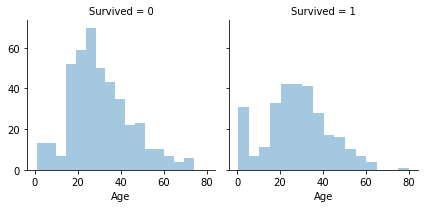

In [78]:
print(df_train['Age'].mean()) #age平均
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

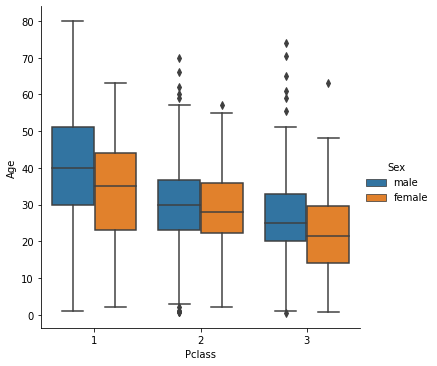

In [79]:
g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=df_train,kind="box")
#男生女生的身高特性有差異
# 觀察到不同艙等的年紀不太相同

In [80]:
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.

le = preprocessing.LabelEncoder()
df_train['Pclass']=le.fit_transform(df_train['Pclass'])

df_train['Sex']=le.fit_transform(df_train['Sex'])

data=df_train[['Sex','Age','Pclass']]
# KNN
#設定用多少鄰居資訊來補值
value_neighbors=1
from sklearn.impute import KNNImputer
#進行 KNN的一些設定
imputer = KNNImputer(n_neighbors=value_neighbors)
#把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(data))
#只呈現有遺失值的資料
display(data[missing_index.values==True])
#只呈現有遺失值的資料-呈現補值的結果
display(df_filled[missing_index.values==True])

,Sex,Age,Pclass
5,1,NaN,2
17,1,NaN,1
19,0,NaN,2
26,1,NaN,2
28,0,NaN,2
29,1,NaN,2
31,0,NaN,0
32,0,NaN,2
36,1,NaN,2
42,1,NaN,2


,0,1,2
5,1.0,22.0,2.0
17,1.0,35.0,1.0
19,0.0,26.0,2.0
26,1.0,22.0,2.0
28,0.0,26.0,2.0
29,1.0,22.0,2.0
31,0.0,38.0,0.0
32,0.0,26.0,2.0
36,1.0,22.0,2.0
42,1.0,22.0,2.0
